In [117]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

Autoregressive models operate under the premise that past values have an effect on current values, which makes the statistical technique popular for analyzing nature, economics, and other processes that vary over time. Multiple regression models forecast a variable using a linear combination of predictors, whereas autoregressive models use a combination of past values of the variable.


An AR(1) autoregressive process is one in which the current value is based on the immediately preceding value, while an AR(2) process is one in which the current value is based on the previous two values. An AR(0) process is used for white noise and has no dependence between the terms. In addition to these variations, there are also many different ways to calculate the coefficients used in these calculations, such as the least squares method.

These concepts and techniques are used by technical analysts to forecast security prices. However, since autoregressive models base their predictions only on past information, they implicitly assume that the fundamental forces that influenced the past prices will not change over time. This can lead to surprising and inaccurate predictions if the underlying forces in question are in fact changing, such as if an industry is undergoing rapid and unprecedented technological transformation.

In [118]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


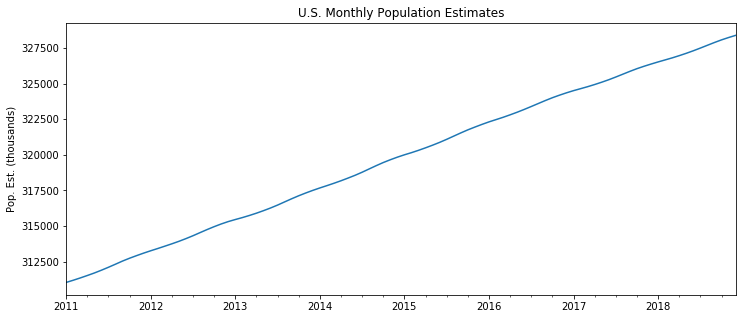

In [119]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [96]:
len(df)

96

In [97]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

In [120]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [121]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        218.270410
L1.PopEst      0.999313
dtype: float64


In [122]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [123]:
predictions1

2018-01-01    326372.104523
2018-02-01    326366.213096
2018-03-01    326360.325715
2018-04-01    326354.442377
2018-05-01    326348.563081
2018-06-01    326342.687822
2018-07-01    326336.816599
2018-08-01    326330.949408
2018-09-01    326325.086247
2018-10-01    326319.227113
2018-11-01    326313.372004
2018-12-01    326307.520915
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [124]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326372.1045, expected=326527
predicted=326366.2131, expected=326669
predicted=326360.3257, expected=326812
predicted=326354.4424, expected=326968
predicted=326348.5631, expected=327134
predicted=326342.6878, expected=327312
predicted=326336.8166, expected=327502
predicted=326330.9494, expected=327698
predicted=326325.0862, expected=327893
predicted=326319.2271, expected=328077
predicted=326313.372 , expected=328241
predicted=326307.5209, expected=328393


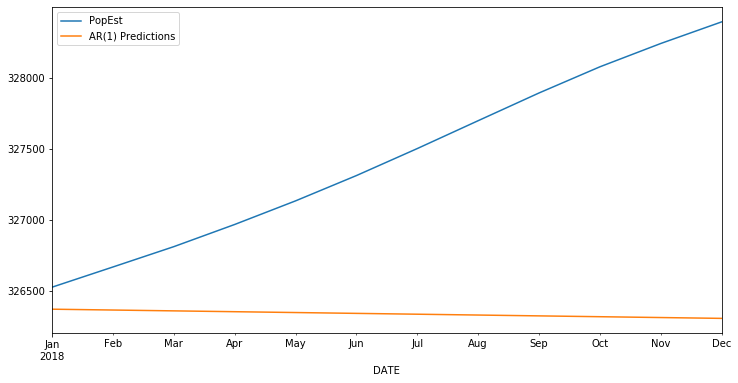

In [125]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [126]:
# Recall that our model was already created above based on the training set
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        130.109868
L1.PopEst      1.996267
L2.PopEst     -0.996676
dtype: float64


In [127]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

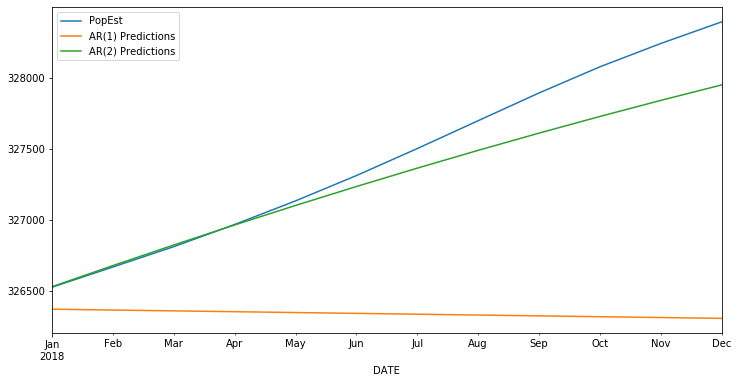

In [128]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [130]:
# Recall that our model was already created above based on the training set
model = AR(train['PopEst'])
AR5fit = model.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit.k_ar}')
print(f'Coefficients:\n{AR5fit.params}')

Lag: 5
Coefficients:
const        157.087171
L1.PopEst      2.889232
L2.PopEst     -2.954317
L3.PopEst      1.062675
L4.PopEst      0.177701
L5.PopEst     -0.175784
dtype: float64


In [131]:
start=len(train)
end=len(train)+len(test)-1
predictions5 = AR5fit.predict(start=start, end=end, dynamic=False).rename('AR(5) Predictions')

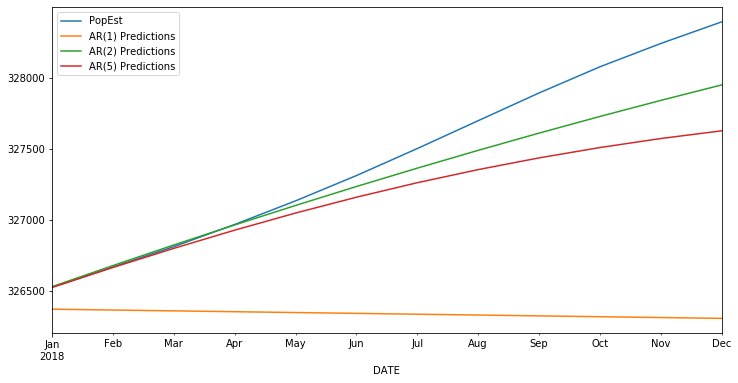

In [132]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions5.plot(legend=True,figsize=(12,6));

In [133]:
model = AR(train['PopEst'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.148310
L1.PopEst      2.259750
L2.PopEst     -2.083569
L3.PopEst      1.596112
L4.PopEst     -1.287019
L5.PopEst      0.827007
L6.PopEst     -0.867290
L7.PopEst      0.844921
L8.PopEst     -0.293341
L9.PopEst      0.195622
L10.PopEst    -0.125081
L11.PopEst    -0.067416
dtype: float64


In [134]:
# Recall that our model was already created above based on the training set
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        130.109868
L1.PopEst      1.996267
L2.PopEst     -0.996676
dtype: float64


In [135]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

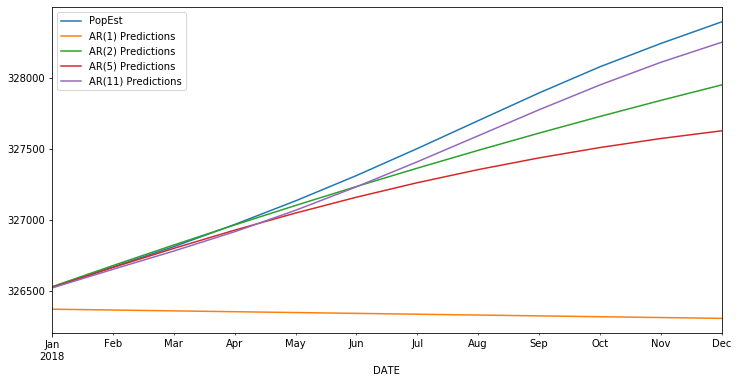

In [136]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions5.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

So correlating all the way back to 11 proved to be the most useful

In [139]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(5)','AR(11)']
preds = [predictions1, predictions2,predictions5,predictions11]  # these are variables, not strings!

for i in range(4):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1591015.319
AR(2) Error: 52371.07527
AR(5) Error: 147814.1497
AR(11) Error: 8581.211201


In [140]:
modls = [AR1fit,AR2fit,AR5fit,ARfit]

for i in range(4):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.543
AR(2) AIC: 5.1564
AR(5) AIC: 4.3292
AR(11) AIC: 3.6749


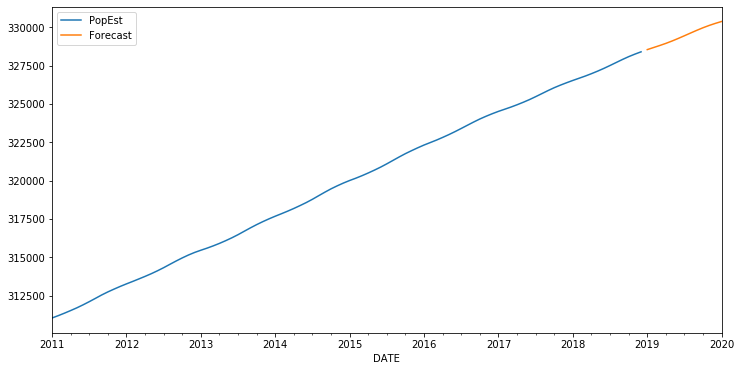

In [141]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));